#  1.Loading dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


• Row ID: index of row

• Order ID: index of order

• Order Date: date of ordering

• Ship Date: date of shipping order

• Ship Mode: Options of shipping method

• Customer ID: index of customer

• Customer Name: name of customer

• Product ID: index of product

• Category: category of product

• Sub-Category: sub-category of product

• Product Name: name of product

• City: city

• State: state

• Postal Cost: postal code of city and state

• Region: region in US

• Country: United States

• Quantity: number of items of order

• Discount: discounted voucher of order

• Profit: how much profit earns from order

• Sales: total price of order after applying discount

#2.Data Validation

Orders, Products and Customers

In [ ]:
print ('Distinct User', df['Customer ID'].nunique())
print ('Distinct Product', df['Product ID'].nunique())
print ('Distinct Order', df['Order ID'].nunique())

Distinct User 793
Distinct Product 1862
Distinct Order 5009


Other Information

In [ ]:
print('Order date values range from', df['Order Date'].min(), 'to', df['Order Date'].max())
print('Ship date values range from', df['Ship Date'].min(), 'to', df['Ship Date'].max())
print('\n')
print('Distinct value in Ship Mode', df['Ship Mode'].unique())
print('Distinct value in Segment', df['Segment'].unique())
print('Distinct value in Region', df['Region'].unique())
print('Distinct value in Category', df['Category'].unique())
print('\n')
print('Sales date values range from', df['Sales'].min(), 'to', df['Sales'].max())
print('Quantity date values range from', df['Quantity'].min(), 'to', df['Quantity'].max())
print('Sales date values range from', df['Sales'].min(), 'to', df['Sales'].max())
print('Discount date values range from', df['Discount'].min(), 'to', df['Discount'].max())
print('Profit date values range from', df['Profit'].min(), 'to', df['Profit'].max())
print('\n')
print('Data shape', df.shape)

Order date values range from 1/1/2017 to 9/9/2017
Ship date values range from 1/1/2015 to 9/9/2017


Distinct value in Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Distinct value in Segment ['Consumer' 'Corporate' 'Home Office']
Distinct value in Region ['South' 'West' 'Central' 'East']
Distinct value in Category ['Furniture' 'Office Supplies' 'Technology']


Sales date values range from 0.444 to 22638.48
Quantity date values range from 1 to 14
Sales date values range from 0.444 to 22638.48
Discount date values range from 0.0 to 0.8
Profit date values range from -6599.978 to 8399.976


Data shape (9994, 21)


# 3.Data Summary & Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)
df['Year'] = pd.to_datetime(df['Order Date'].dt.year.astype(str) + '-01-01')



In [ ]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [ ]:
df.nunique()

,0
Row ID,9994
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531


In [ ]:
df.drop(columns=df.nunique()[df.nunique() == 1].index, inplace=True)

#4.EDA

##Categorical Data

### Region

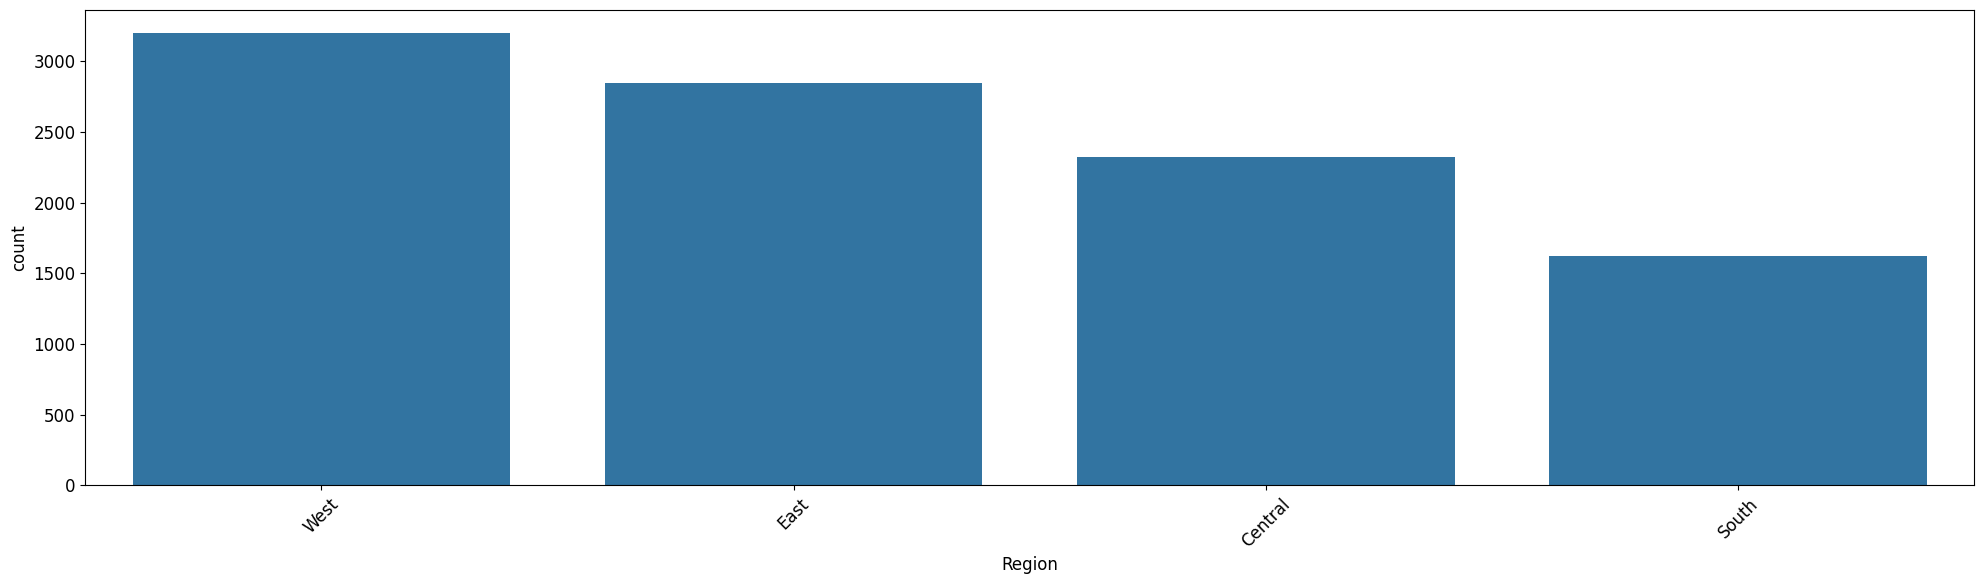

In [ ]:
plt.figure(figsize=( 20, 6))
sns.countplot(x='Region', data=df,order = df['Region'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "West" region has the highest number of transactions.

The "South" region has the lowest count.

In [ ]:
from scipy import stats
sales_region1 = df[df["Region"] == "East"]["Sales"]
sales_region2 = df[df["Region"] == "West"]["Sales"]
sales_region3 = df[df["Region"] == "South"]["Sales"]
sales_region4 = df[df["Region"] == "Central"]["Sales"]

f_stat, p_value = stats.f_oneway(sales_region1, sales_region2, sales_region3, sales_region4)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between the regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between the regions.")

F-statistic: 0.8006
P-value: 0.4933
Fail to reject the null hypothesis: No significant difference in sales between the regions.


### State

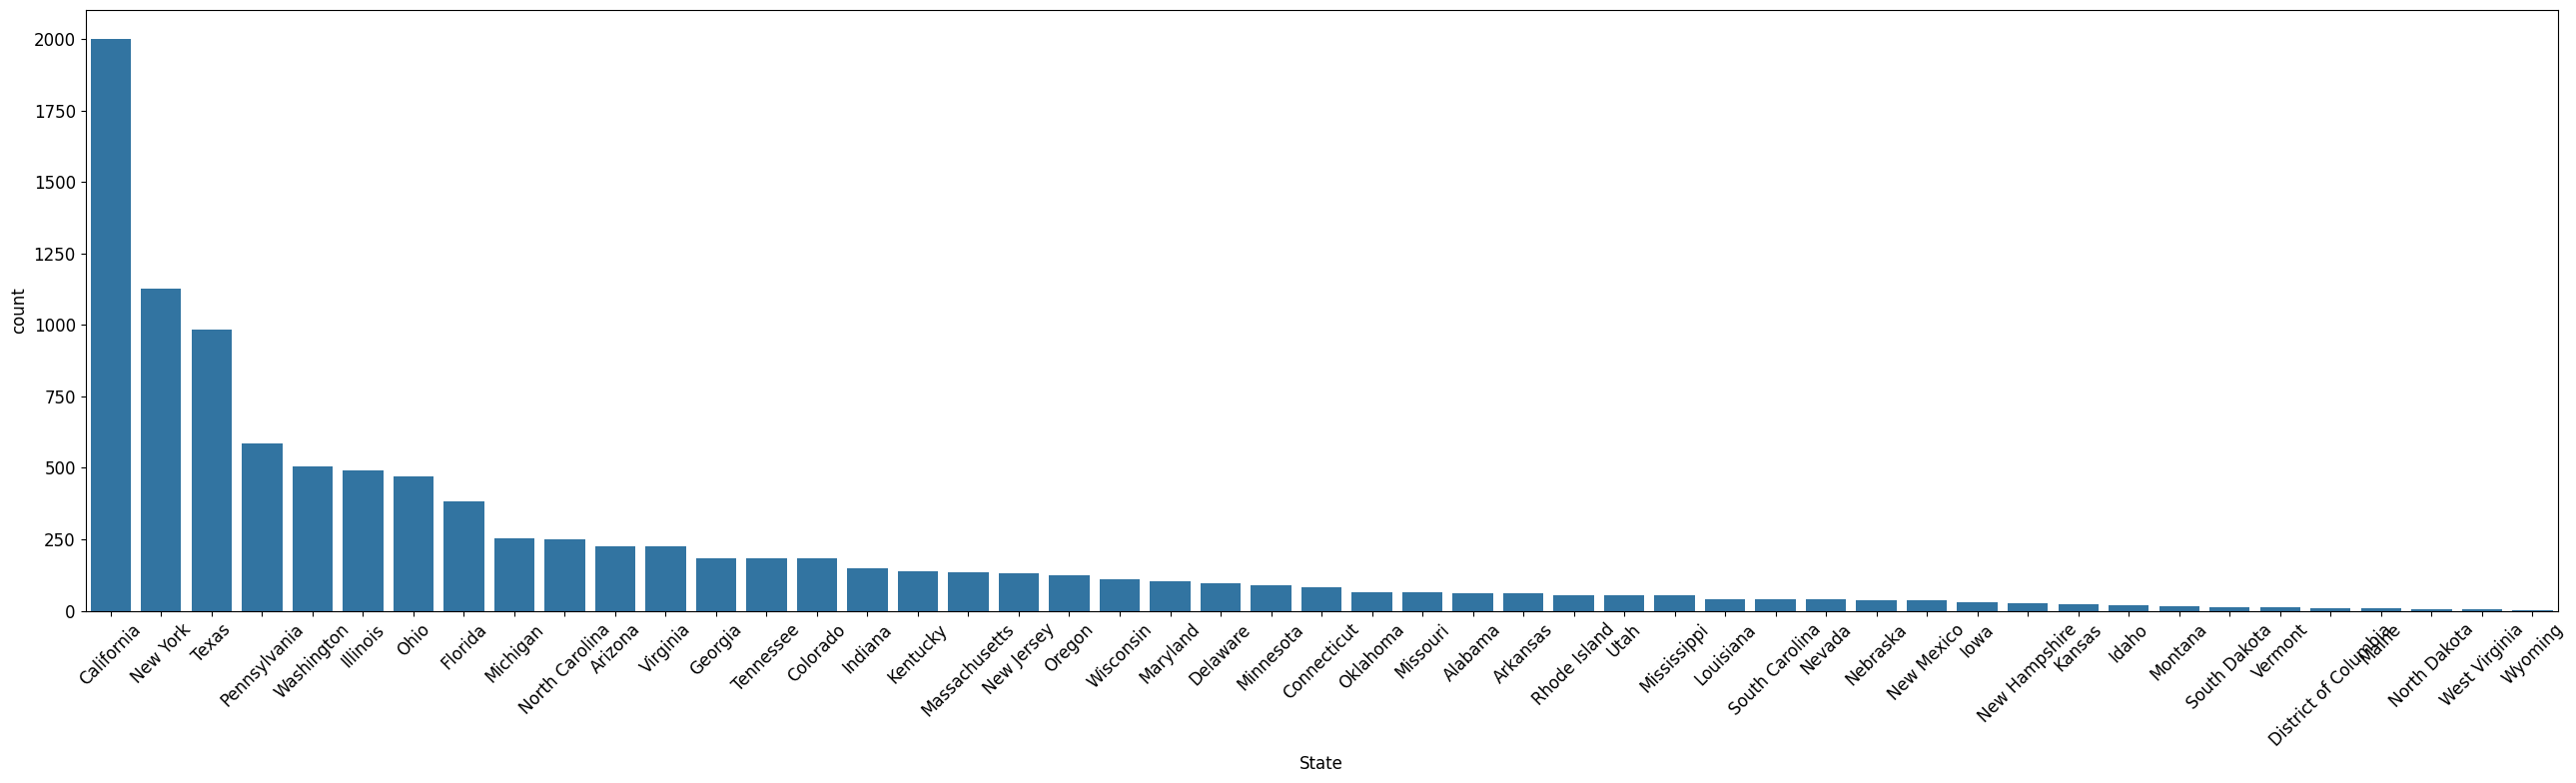

In [ ]:
plt.figure(figsize=( 26, 8))
sns.countplot(x='State', data=df,order = df['State'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
states = df['State'].unique()
sales_data = [df[df["State"] == state]["Sales"] for state in states]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between states.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between states.")


F-statistic: 1.8806
P-value: 0.0002
Reject the null hypothesis: There is a significant difference in sales between states.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD: So sánh từng cặp Region về Sales
tukey = pairwise_tukeyhsd(df['Sales'], df['State'], alpha=0.05)
print(tukey)

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1               group2         meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------------------------
             Alabama              Arizona -162.3376 0.9999  -520.2094  195.5342  False
             Alabama             Arkansas -125.2111    1.0  -575.7643  325.3422  False
             Alabama           California  -91.1171    1.0  -413.1868  230.9526  False
             Alabama             Colorado -143.4283    1.0  -510.0317  223.1751  False
             Alabama          Connecticut -156.6227    1.0  -575.5997  262.3543  False
             Alabama             Delaware  -33.8979    1.0  -439.6337  371.8378  False
             Alabama District of Columbia  -33.3446    1.0  -878.7368  812.0476  False
             Alabama              Florida  -86.2337    1.0  -427.8363  255.3689  False
             Alabama              Georgia  

### City

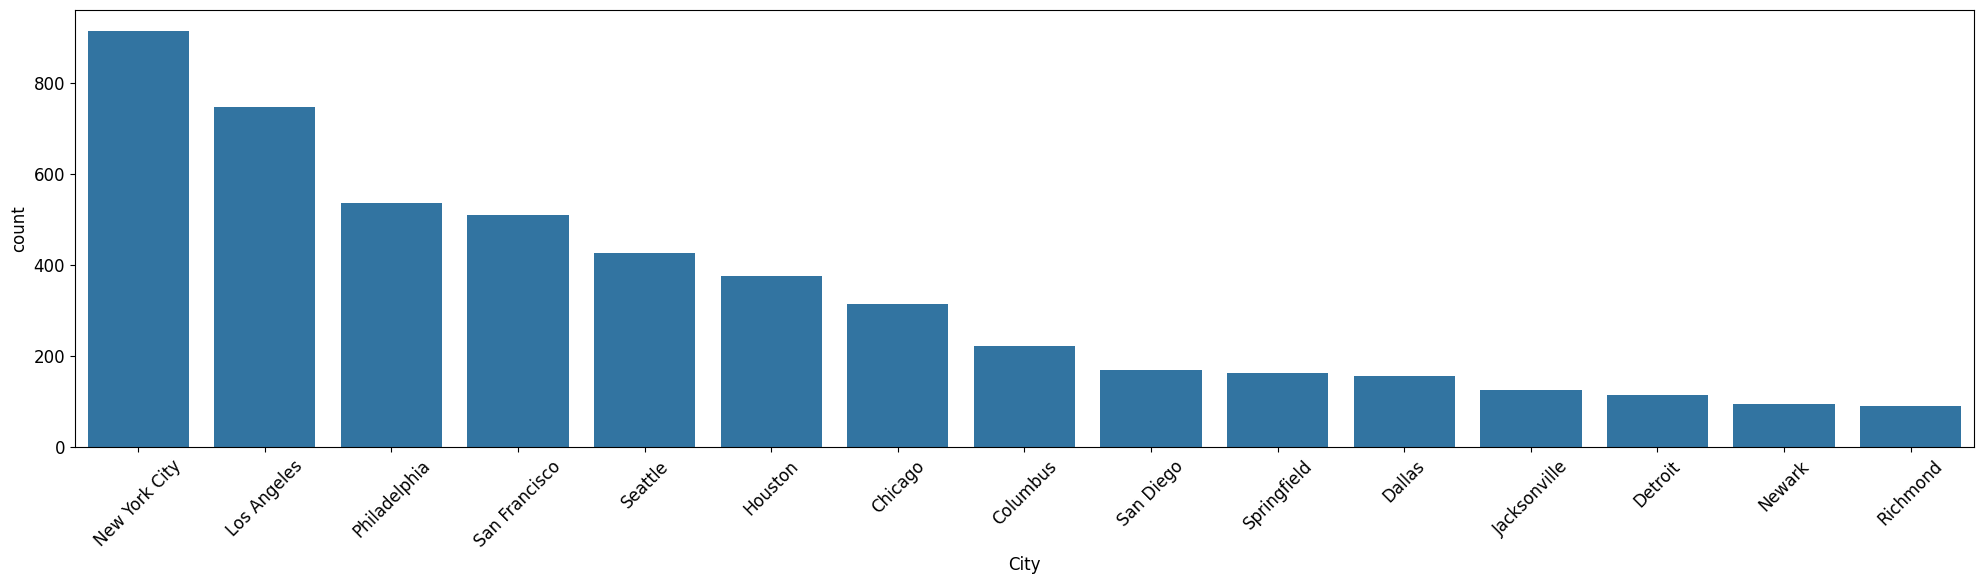

In [ ]:
top_cities = df['City'].value_counts().nlargest(15)
df_top = df[df['City'].isin(top_cities.index)]


plt.figure(figsize=(20, 6))
sns.countplot(x='City',data=df_top,order=top_cities.index,color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cities = df['City'].unique()
sales_data = [df[df["City"] == city]["Sales"] for city in cities]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between cities.")

F-statistic: 0.6652
P-value: 1.0000
Fail to reject the null hypothesis: No significant difference in sales between cities.


### Category

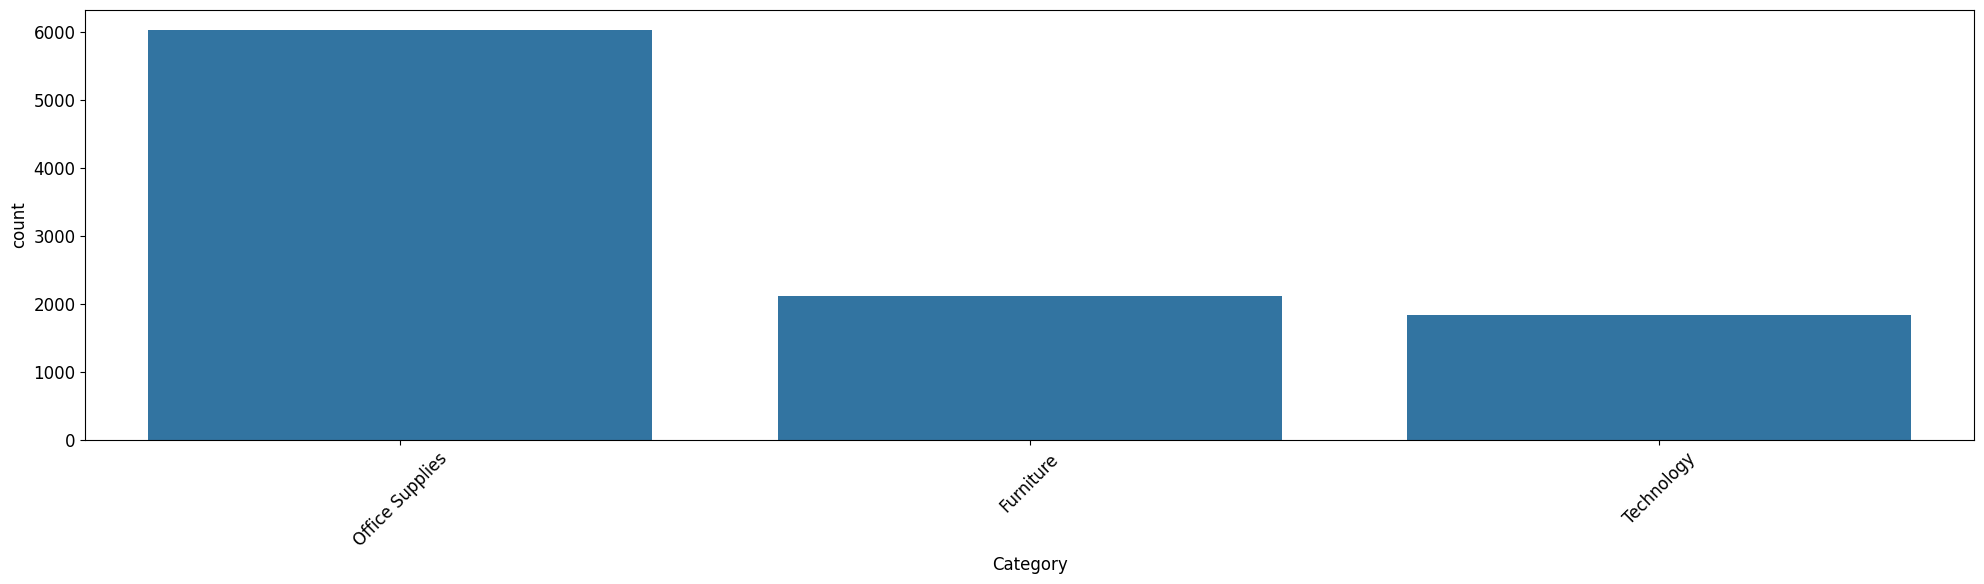

In [ ]:
plt.figure(figsize=( 20, 6))
sns.countplot(x='Category', data=df,order = df['Category'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
categories = df['Category'].unique()
sales_data = [df[df["Category"] == category]["Sales"] for category in categories]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between categories.")


F-statistic: 265.4898
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales between categories.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['Sales'], df['Category'], alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------
      Furniture Office Supplies -230.5108   0.0 -266.4558 -194.5657   True
      Furniture      Technology  102.8744   0.0    57.563  148.1858   True
Office Supplies      Technology  333.3852   0.0  295.5194   371.251   True
--------------------------------------------------------------------------


### Sub-Category

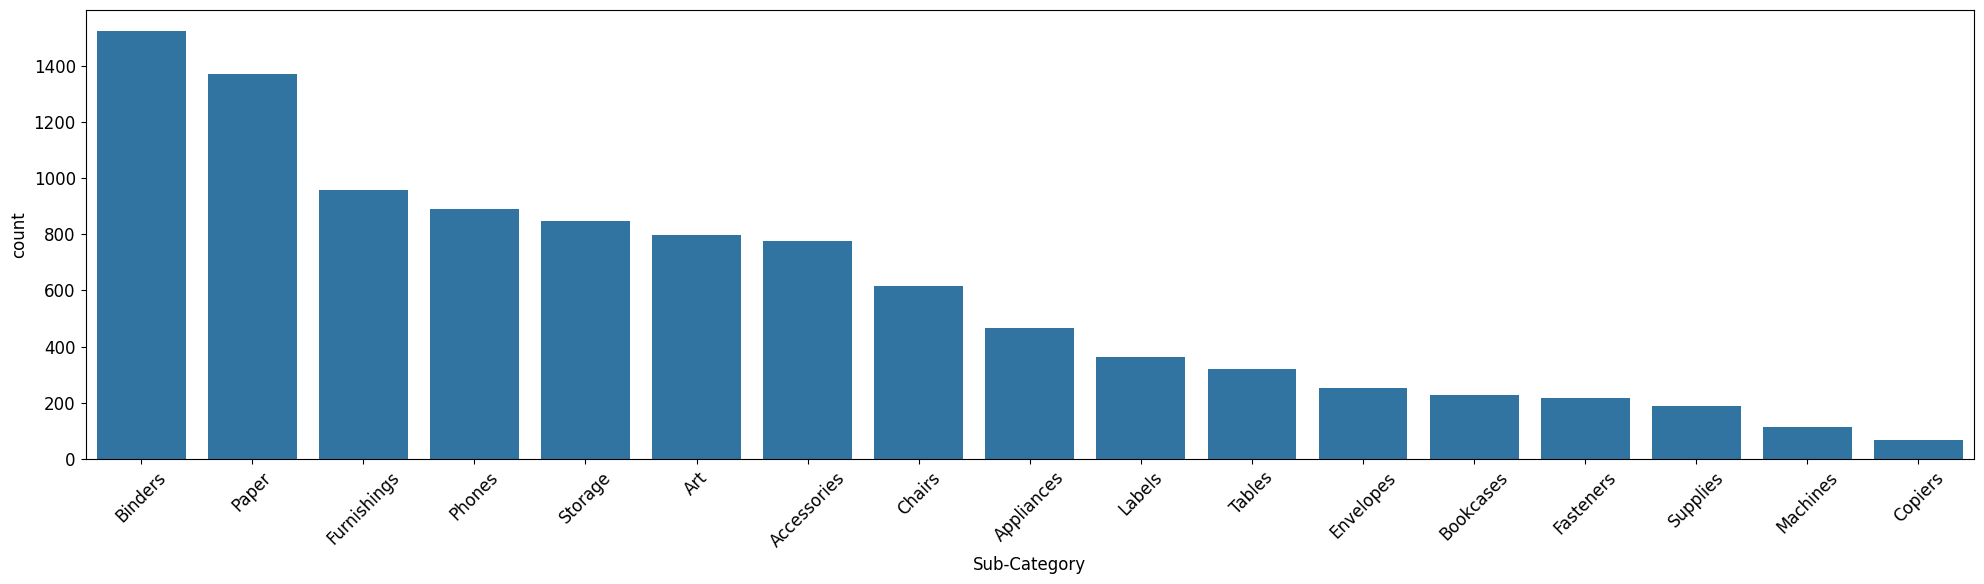

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Sub-Category', data=df,order = df['Sub-Category'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

+ "Furnishings" has the highest number of sales.

+ "Bookcases" has the lowest number of sales.

In [ ]:
sub_categories = df['Sub-Category'].unique()
sales_data = [df[df["Sub-Category"] == sub_cat]["Sales"] for sub_cat in sub_categories]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between sub-categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between sub-categories.")


F-statistic: 155.8728
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales between sub-categories.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['Sales'], df['Sub-Category'], alpha=0.05)
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
Accessories  Appliances    14.7811    1.0   -98.3524   127.9146  False
Accessories         Art  -181.9058    0.0  -279.2992   -84.5123   True
Accessories     Binders    -82.414 0.0708  -167.5716     2.7435  False
Accessories   Bookcases    287.885    0.0   142.4794   433.2907   True
Accessories      Chairs   316.3578    0.0    212.228   420.4877   True
Accessories     Copiers   1982.967    0.0  1738.8728  2227.0613   True
Accessories   Envelopes  -151.1069 0.0188  -290.6438     -11.57   True
Accessories   Fasteners  -202.0378 0.0003  -350.2638   -53.8119   True
Accessories Furnishings  -120.1489  0.001  -213.4134   -26.8845   True
Accessories      Labels  -181.6715    0.0  -304.3051    -59.038   True
Accessories    Machines  1429.5787    0.0  1236.7178  1622.4397   True
Access

### Segment

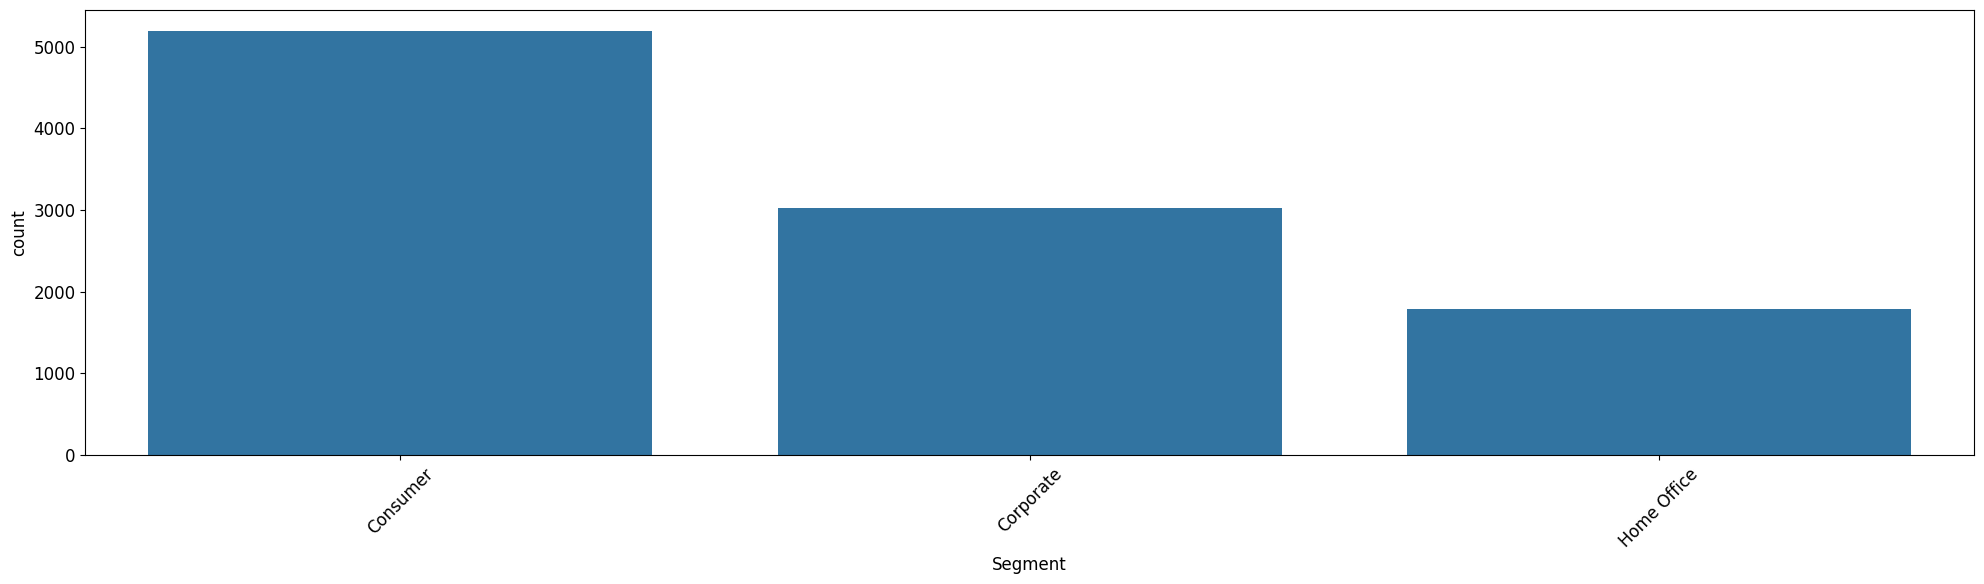

In [ ]:
plt.figure(figsize=( 20, 6))
sns.countplot(x='Segment', data=df,order = df['Segment'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  + The "Consumer" segment is the most dominant in the dataset.
  
  + " Home Office" has the least number of orders.

In [ ]:
consumer_sales = df[df["Segment"] == "Consumer"]["Sales"]
corporate_sales = df[df["Segment"] == "Corporate"]["Sales"]
home_office_sales = df[df["Segment"] == "Home Office"]["Sales"]

f_stat, p_value = stats.f_oneway(consumer_sales, corporate_sales, home_office_sales)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one segment has significantly different sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales among segments.")

F-statistic: 0.5952
P-value: 0.5515
Fail to reject the null hypothesis: No significant difference in sales among segments.


### Ship Mode

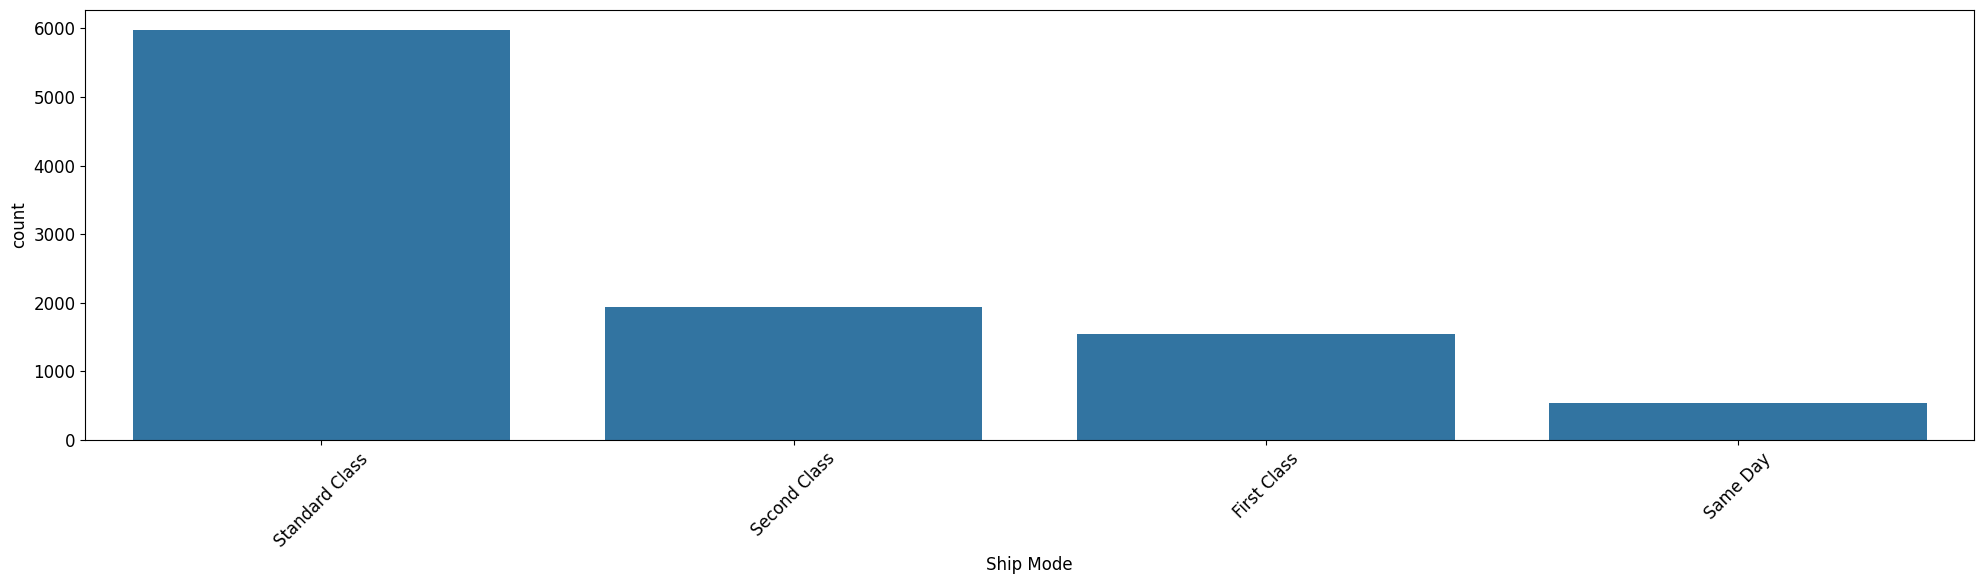

In [ ]:
plt.figure(figsize=( 20, 6))
sns.countplot(x='Ship Mode', data=df,order = df['Ship Mode'].value_counts().index,  color='#1f77b4')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  + "Standard Class" is the most frequently used shipping method.

  + "Same Day" shipping has the lowest count.

In [ ]:
ship = df['Ship Mode'].unique()
sales_data = [df[df['Ship Mode'] == ship_mode]["Sales"] for ship_mode in ship]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between Ship Mode.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between Ship Mode.")


F-statistic: 0.1136
P-value: 0.9522
Fail to reject the null hypothesis: No significant difference in sales between Ship Mode.


##Numerical Data

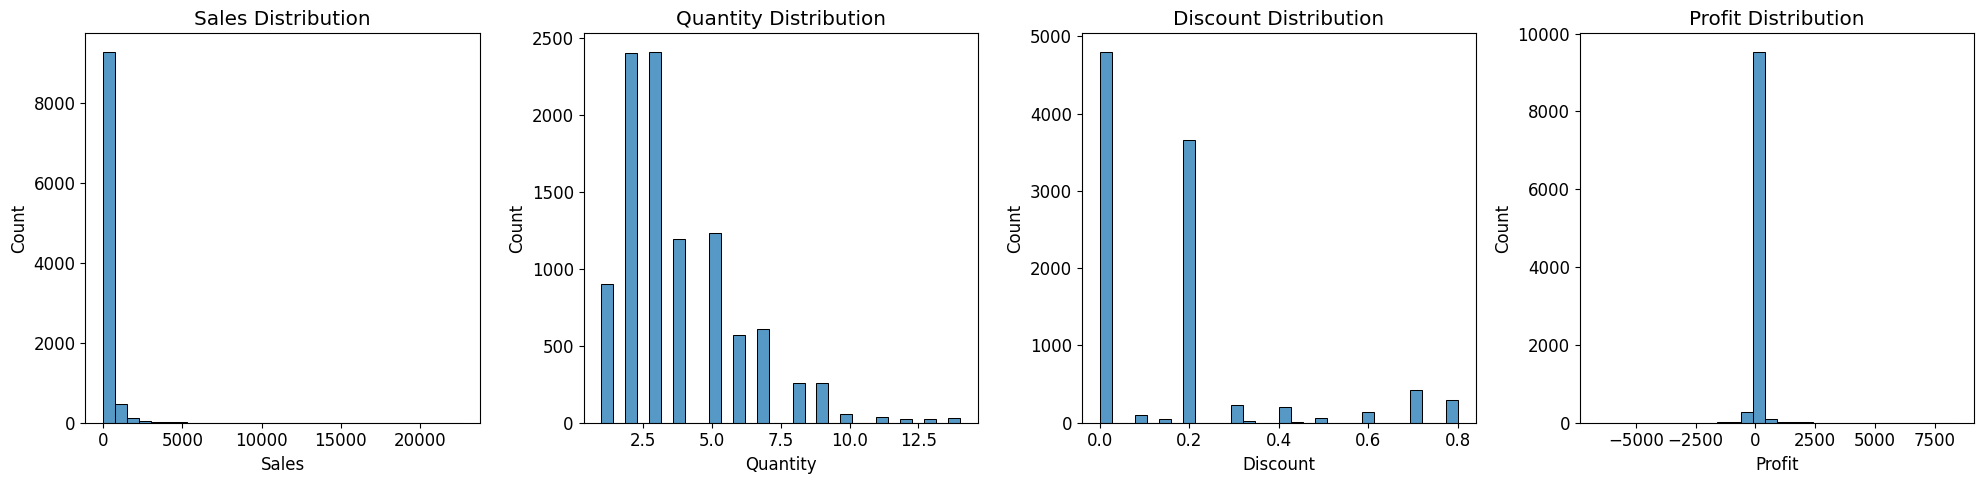

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(df["Sales"],bins=30,ax=axs[0])
axs[0].set_title('Sales Distribution')

sns.histplot(df["Quantity"],bins=30, ax=axs[1])
axs[1].set_title('Quantity Distribution')

sns.histplot(df["Discount"], bins=30, ax=axs[2])
axs[2].set_title('Discount Distribution')

sns.histplot(df["Profit"],bins=30, ax=axs[3])
axs[3].set_title('Profit Distribution')

plt.tight_layout()
plt.show()

,0
Sales,"Axes(0.125,0.53;0.352273x0.35)"
Quantity,"Axes(0.547727,0.53;0.352273x0.35)"
Discount,"Axes(0.125,0.11;0.352273x0.35)"
Profit,"Axes(0.547727,0.11;0.352273x0.35)"


<Figure size 9000x5800 with 0 Axes>

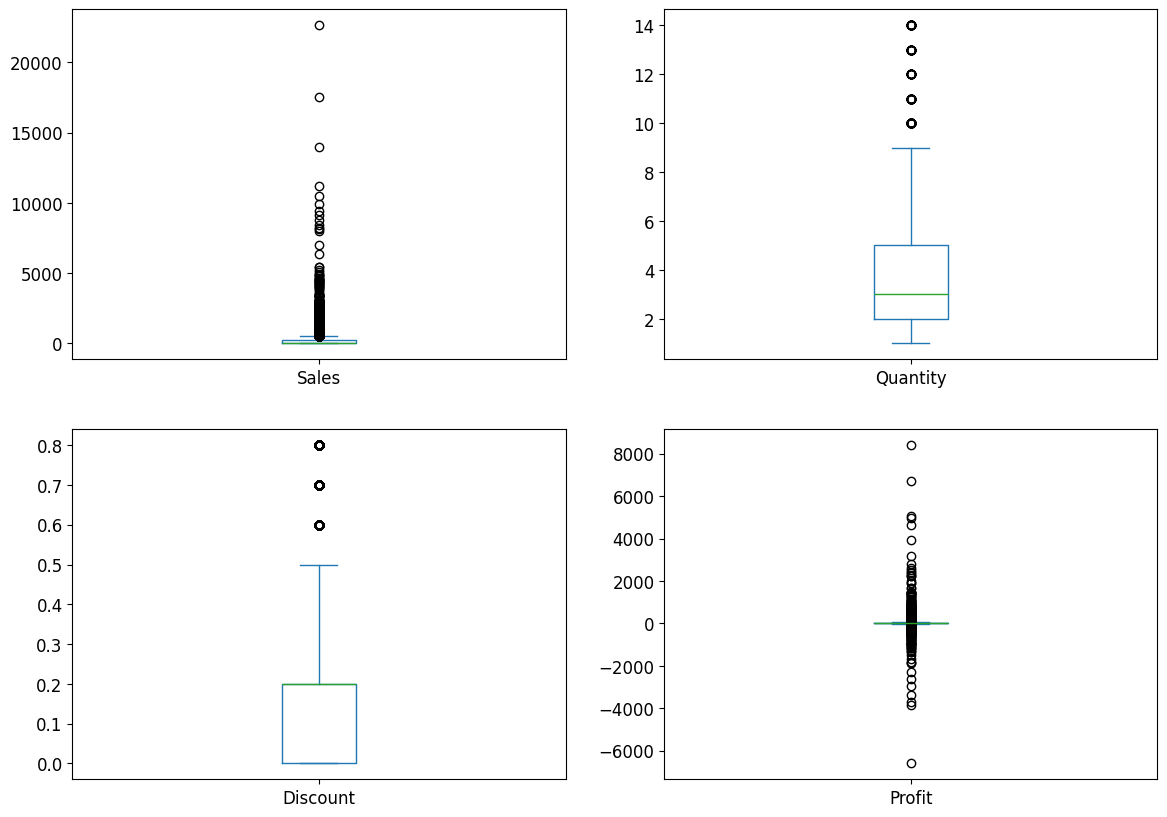

In [ ]:
list= ['Sales', 'Quantity','Discount', 'Profit']
plt.figure(figsize=(90, 58))
df[list].plot(kind='box', subplots=True, layout=(2,2), sharex=False)

Insights

  + The Sales and Profit distributions exhibit a high number of outliers, suggesting that a small number of transactions contribute significantly to total sales and profits.

  + The Discount distribution appears more controlled, with no extreme variations.

  + The Quantity distribution is more balanced, though some large orders stand out.

In [ ]:
from scipy.stats.mstats import winsorize
# List of numerical features
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']
for feature in num_features:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])  # Cap 5% on both sides
    print(f"Outliers capped for {feature}")

Outliers capped for Sales
Outliers capped for Quantity
Outliers capped for Discount
Outliers capped for Profit


,0
Sales,"Axes(0.125,0.53;0.352273x0.35)"
Quantity,"Axes(0.547727,0.53;0.352273x0.35)"
Discount,"Axes(0.125,0.11;0.352273x0.35)"
Profit,"Axes(0.547727,0.11;0.352273x0.35)"


<Figure size 9000x5800 with 0 Axes>

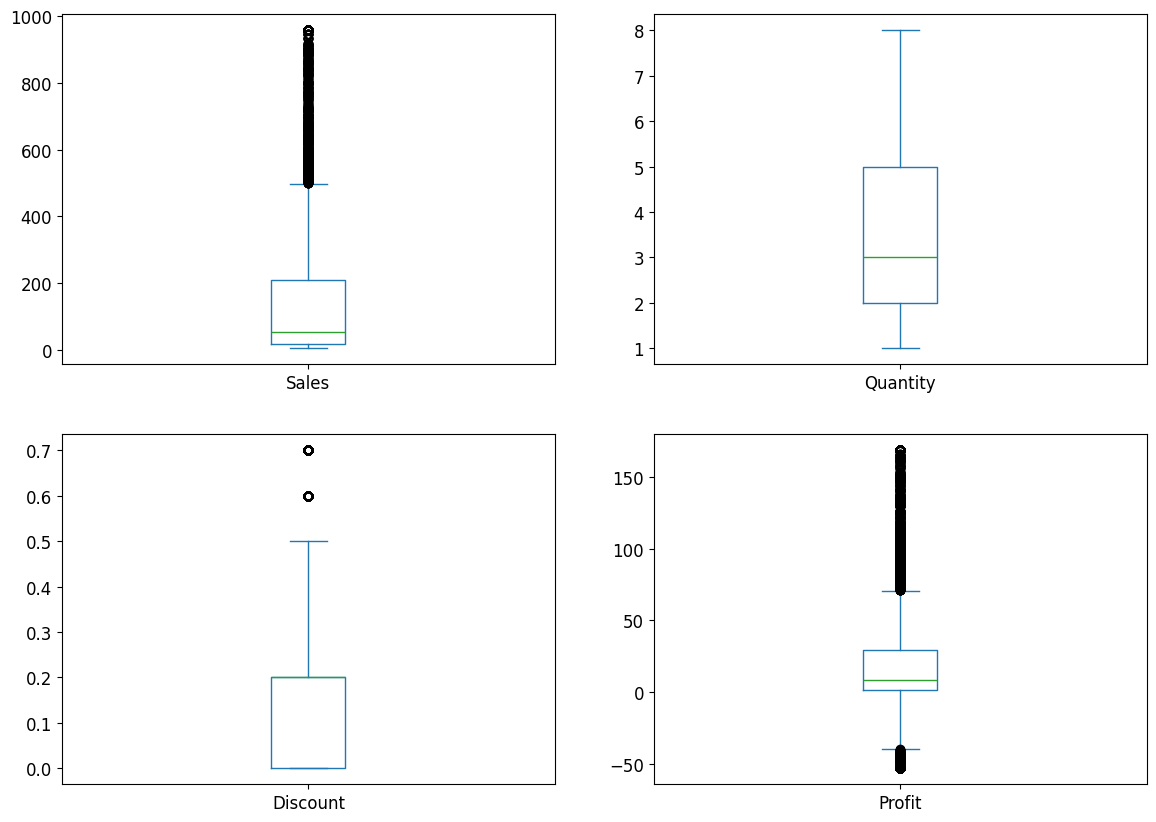

In [ ]:
list= ['Sales', 'Quantity','Discount', 'Profit']
plt.figure(figsize=(90, 58))
df[list].plot(kind='box', subplots=True, layout=(2,2), sharex=False)

Insights from the Boxplots

- Sales Boxplot
  + Highly skewed with numerous outliers, indicating the presence of extreme high-value sales transactions.
  + Most sales values are concentrated in a lower range, suggesting that high sales amounts are rare but significantly higher when they occur.

- Quantity Boxplot
  + The distribution is relatively balanced, but there are outliers representing large-quantity purchases.
  + Majority of transactions involve small quantities, which aligns with typical retail trends.

- Discount Boxplot
  + Discounts are applied in a structured manner, as seen by the discrete distribution.
  + The presence of higher discounts in certain cases may explain the negative correlation with profit observed earlier.

- Profit Boxplot
  + High variance with many outliers on both positive and negative ends, indicating that some transactions lead to significant losses while others generate large profits.
  + The presence of extreme negative profit values suggests that some sales are unprofitable, possibly due to excessive discounts or cost structure issues.

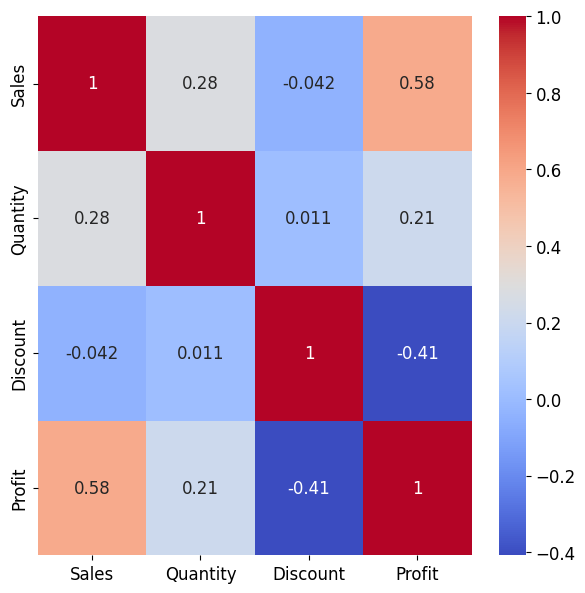

In [ ]:
list= ['Sales', 'Quantity','Discount', 'Profit']

plt.figure(figsize=(7,7))
sns.heatmap(df[list].corr(), annot=True, cmap="coolwarm")
plt.show()

Insights

Sales vs. Profit (0.17) → Weak positive correlation; sales slightly impact profit but are not the main driver due to factors like costs and discounts.

Sales vs. Quantity (0.44) → Weak to moderate positive correlation; higher sales are somewhat linked to selling more units, but pricing strategies also matter.

Discount vs. Profit (-0.48) → Weak to moderate negative correlation; higher discounts reduce profit, suggesting a need to reassess discount strategies.

Discount vs. Sales (-0.029) → Negligible correlation; discounts have little effect on boosting sales, indicating other factors influence purchasing behavior.

Quantity vs. Profit (0.061) → Very weak positive correlation; selling more units does not significantly improve profit, likely due to cost and discounting structures.

#5.Time Analysis

**Question : How was the Performance Overall**

### Visualize sales trends (Total Sales) by Month, Quarter, and Year

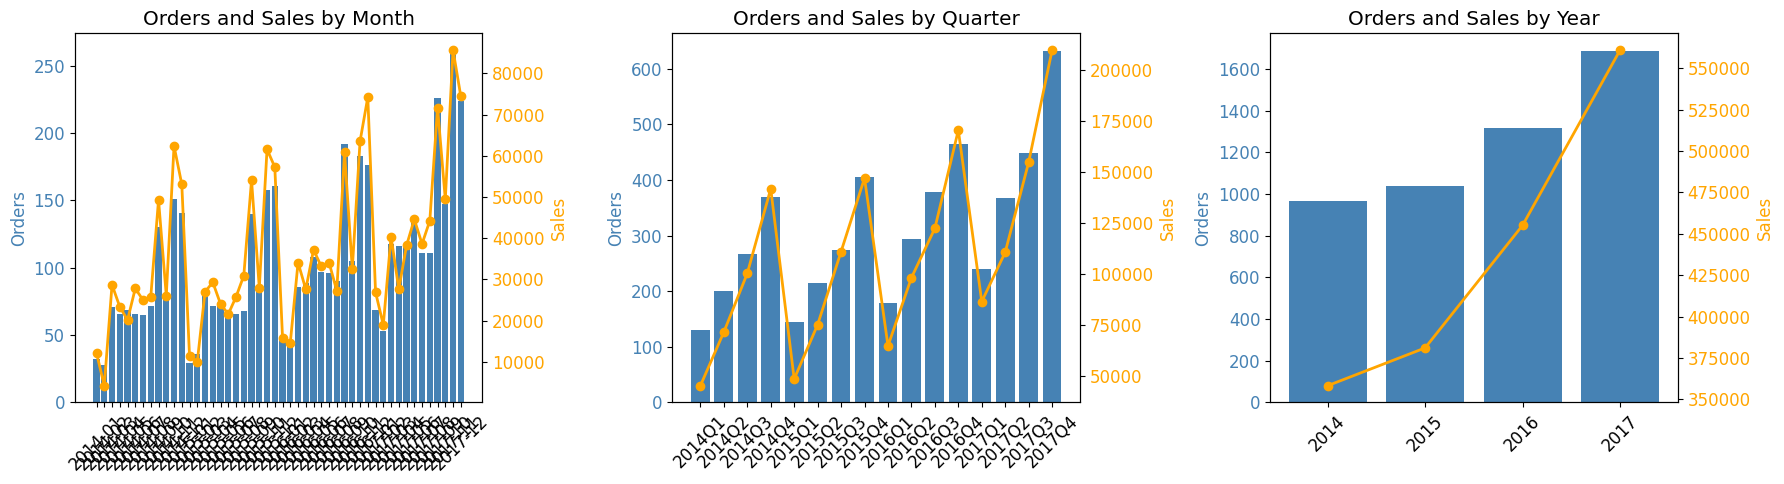

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

time_levels = [
    ('Month', '%Y-%m', 'Orders and Sales by Month'),
    ('Quarter', None, 'Orders and Sales by Quarter'),
    ('Year', '%Y', 'Orders and Sales by Year')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (col, fmt, title) in zip(axes, time_levels):
    grouped = df.groupby(col).agg(
        total_sales=('Sales', 'sum'),
        total_orders=('Order ID', 'nunique')
    ).reset_index()

    if col == 'Quarter':
        grouped['__sort__'] = grouped[col].str.extract(r'(\d{4})Q(\d)').astype(int).apply(lambda x: x[0]*10 + x[1], axis=1)
        grouped = grouped.sort_values('__sort__').drop(columns='__sort__')
        x_labels = grouped[col]
    else:
        grouped = grouped.sort_values(col)
        x_labels = grouped[col].dt.strftime(fmt)

    ax2 = ax.twinx()
    ax.bar(x_labels, grouped['total_orders'], color='steelblue', label='Orders')
    ax.set_ylabel('Orders', color='steelblue')
    ax.tick_params(axis='y', labelcolor='steelblue')
    ax.tick_params(axis='x', rotation=45)

    ax2.plot(x_labels, grouped['total_sales'], color='orange', marker='o', linewidth=2, label='Sales')
    ax2.set_ylabel('Sales', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Analyze sales trends using a trendline

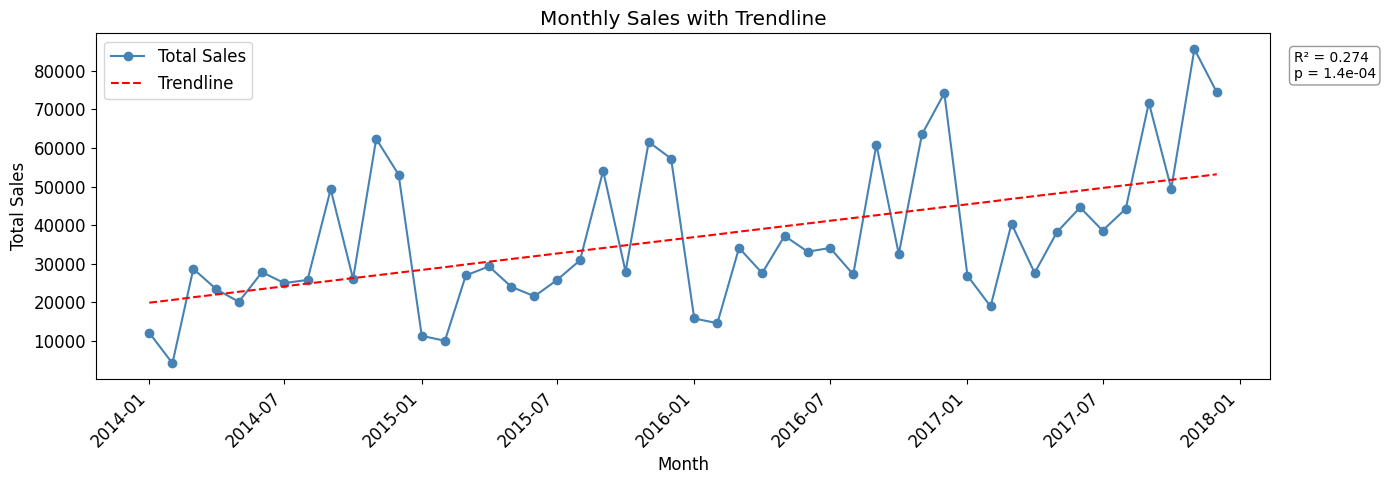

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Tổng doanh số theo tháng
monthly = df.groupby('Month')['Sales'].sum().sort_index()
x = range(len(monthly))

# Hồi quy tuyến tính
slope, intercept, r, p, _ = linregress(x, monthly)
trendline = intercept + slope * pd.Series(x)

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(monthly.index, monthly, 'o-', label='Total Sales', color='steelblue')
plt.plot(monthly.index, trendline, '--', label='Trendline', color='red')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Trendline')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Chú thích R² và p-value
plt.annotate(f'R² = {r**2:.3f}\np = {p:.1e}', xy=(1.02, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.show()

# hiện tượng biến động này có xu hướng không (R-square = 0 là không có)
# xu hướng này tăng hay giảm
# xu hướng mạnh hay giảm
# xu hướng này có ý nghĩa thống kê không
# -> xu hướng tăng (dốc)
# -> xu hướng mạnh yếu (R-square) : 0.27 có xu hướng nhưng không mạnh
# -> xu hướng có ý nghĩa thống kê
# => có 1 xu hướng tăng về thu bán hàng qua thời gian , nhưng không lớn , và xu hướng có ý nghĩa thông kê

hiện tượng biến động này có xu hướng không (R-square = 0 là không có)
xu hướng này tăng hay giảm
xu hướng mạnh hay giảm
xu hướng này có ý nghĩa thống kê không
-> xu hướng tăng (dốc)
-> xu hướng mạnh yếu (R-square) : 0.27 có xu hướng nhưng không mạnh
-> xu hướng có ý nghĩa thống kê
=> có 1 xu hướng tăng về thu bán hàng qua thời gian , nhưng không lớn , và xu hướng có ý nghĩa thông kê

- Cả tổng số đơn hàng và doanh thu đều có xu hướng tăng dần qua các năm từ 2014 đến 2017, cho thấy doanh nghiệp đang phát triển tốt theo thời gian.

- Có dấu hiệu mùa vụ (seasonality) : Cả đơn hàng và doanh thu đều có xu hướng tăng mạnh vào cuối năm, có thể do: Mùa lễ hội, mua sắm cuối năm (Black Friday, Giáng Sinh…), Các chương trình khuyến mãi lớn thường tập trung vào Q4

### Analyze sales trends using the moving average method

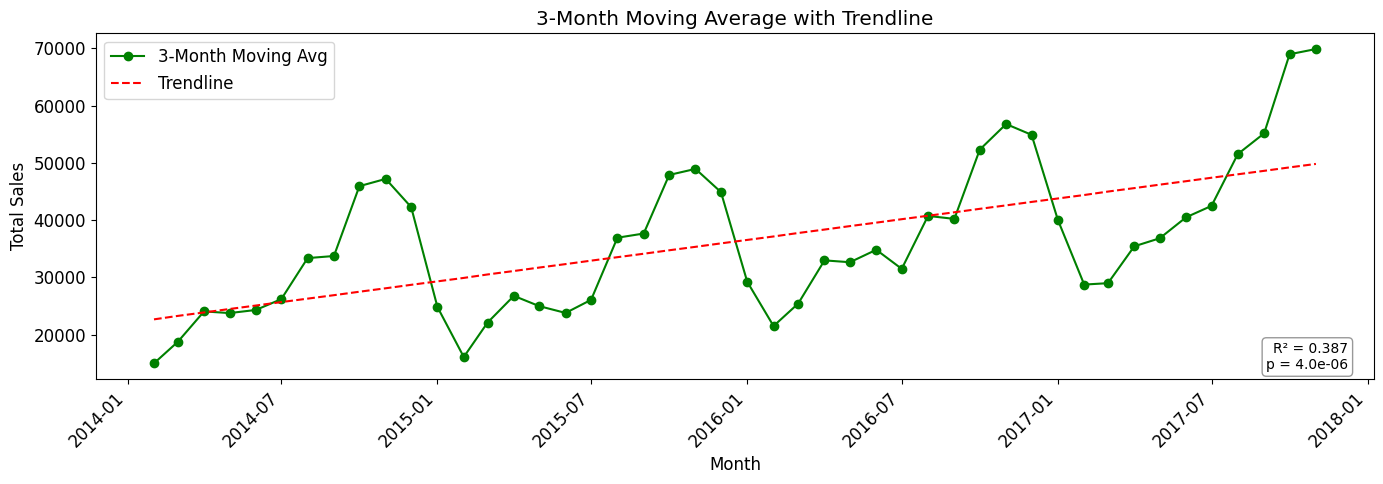

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Tổng doanh số theo tháng
monthly = df.groupby('Month', as_index=False)['Sales'].sum().rename(columns={'Sales': 'total_sales'})

# Tính trung bình trượt (3 tháng)
monthly['sales_ma'] = monthly['total_sales'].rolling(3, center=True).mean()

# Hồi quy tuyến tính trên moving average
ma_data = monthly.dropna(subset=['sales_ma']).reset_index(drop=True)
ma_data['x'] = range(len(ma_data))
slope, intercept, r, p, _ = linregress(ma_data['x'], ma_data['sales_ma'])
trendline = intercept + slope * ma_data['x']

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(ma_data['Month'], ma_data['sales_ma'], 'o-', color='green', label='3-Month Moving Avg')
plt.plot(ma_data['Month'], trendline, '--', color='red', label='Trendline')

plt.title('3-Month Moving Average with Trendline')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()

# R² và p-value
plt.annotate(f'R² = {r**2:.3f}\np = {p:.1e}', xy=(0.98, 0.02), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.show()


### Analyze seasonality in the time series data

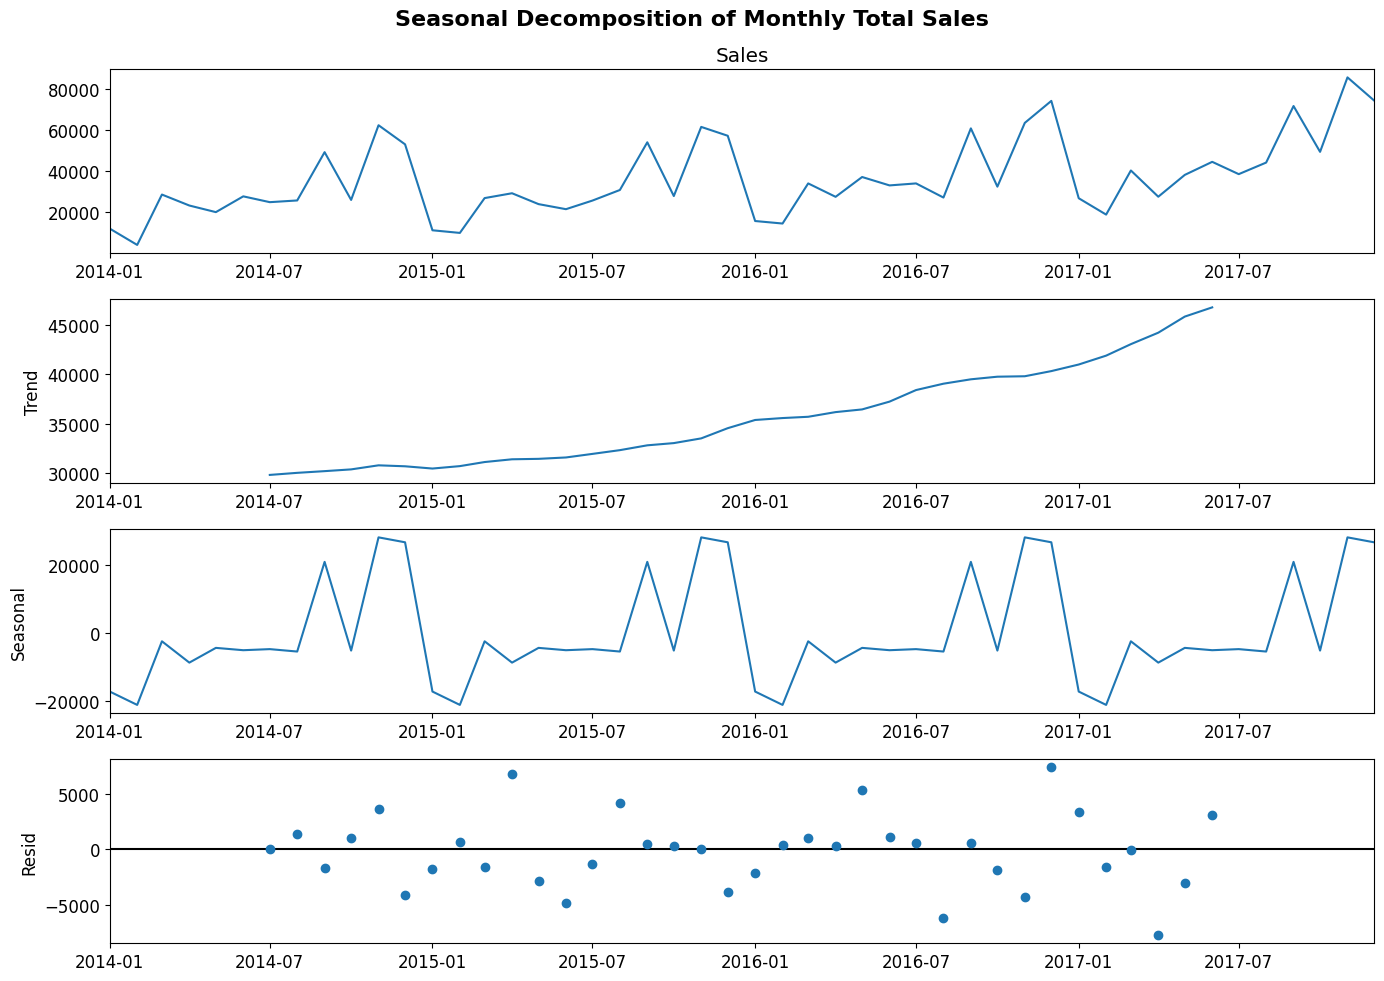

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

monthly = df.groupby('Month')['Sales'].sum()
result = seasonal_decompose(monthly, model='additive', period=12) # Phân tích thành phần thời gian (chu kỳ 12 tháng)

result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Total Sales', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


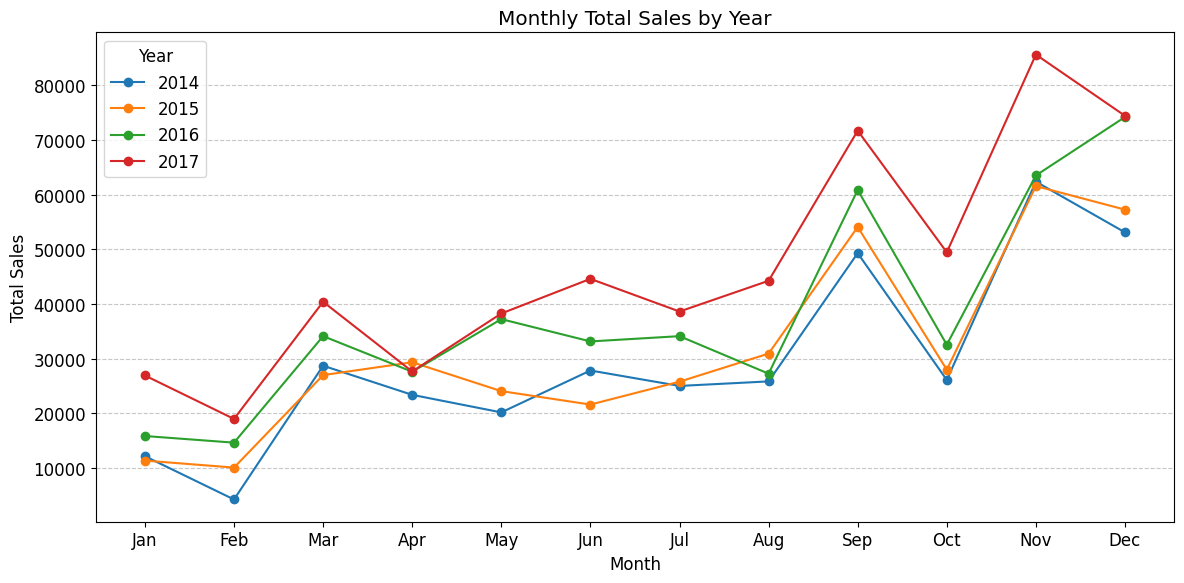

In [ ]:
import matplotlib.pyplot as plt

# Tổng doanh số theo tháng và năm
monthly = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Sales'].sum().unstack(0)

# Vẽ biểu đồ
monthly.plot(marker='o', figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [ ]:
# 1. Aggregate sales by month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()
monthly_sales = pd.to_numeric(monthly_sales, errors='coerce').dropna()

In [ ]:
# 2. Stationarity check
result = adfuller(monthly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("❌ Chuỗi không dừng → cần sai phân.")
else:
    print("✅ Chuỗi đã dừng.")

ADF Statistic: -4.163079145296712
p-value: 0.0007604105252371832
✅ Chuỗi đã dừng.


In [ ]:
del list

In [ ]:
# 3. Parameter grid search
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1134.9135366833339


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1453.2461019712248
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:735.1373749020861
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:507.63104326620333
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:738.1610151116117


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1270.662105119424
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:511.0978561773028
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:477.4390093576055
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1089.7253716227897
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15328.067381481822


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:708.592496277796
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:468.33485754000833
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:838.9098030957667
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14980.952102192132
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:508.30542061004064


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:469.3478021463392
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1044.7326129528378


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1419.96593107878
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:709.4950843200967
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:465.07019458361583
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:731.2712618335373


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1347.1668715881533
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:483.75504300829715
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:465.80145275286156
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1011.2026237416808


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6979.367254044496
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:679.1995304971845
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:436.32232503541803
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:763.2729307843513


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3875.322597495929
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:476.24211223815456
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:438.1082546334606
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1066.9866990941896
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:7570.992004433162
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:723.3592152761968


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:483.7553538648448
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:766.43435177817


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1326.9317014197577
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:483.0891172659907
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:485.06697942969726
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1033.4283807469076


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:6593.555649132311
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:702.6993239127316
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:458.0460403545155
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:720.3604966727551
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5217.474851160499
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:478.4389621861105


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:460.03049446204926
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1039.2918798792678
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6964.456614132113
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:703.2153123087112
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:461.4589484240147
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:741.974779169732


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4646.082556345846
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:460.31420440074754
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:462.1292375861665
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1012.0964493268029


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:5394.716825020841
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:680.7682572646492
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:438.3003785135198
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:705.0988111048669
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3742.945695421128
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:458.2772480729356
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:440.1017516667258


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC: 436.322

In [ ]:
# 4. Fit best model (ví dụ lấy (0,1,1)(0,1,1,12))
best_model = SARIMAX(monthly_sales,
                     order=(0,1,1),
                     seasonal_order=(0,1,1,12),
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit()

print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -215.161
Date:                            Fri, 11 Apr 2025   AIC                            436.322
Time:                                    03:53:26   BIC                            439.456
Sample:                                01-31-2014   HQIC                           437.002
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8656      0.106     -8.187      0.000      -1.073      -0.658
ma.S.L12      -0.2508      0.198   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 9994
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -69512.795
Date:                            Fri, 11 Apr 2025   AIC                         139031.591
Time:                                    03:41:04   BIC                         139053.212
Sample:                                         0   HQIC                        139038.911
                                           - 9994                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.014    -73.629      0.000      -1.027      -0.973
ma.S.L12      -0.9969      0.001   

In [ ]:
# 5. Forecast
pred = best_model.get_forecast(steps=12)
pred_ci = pred.conf_int()
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
pred.predicted_mean.index = forecast_index
pred_ci.index = forecast_index

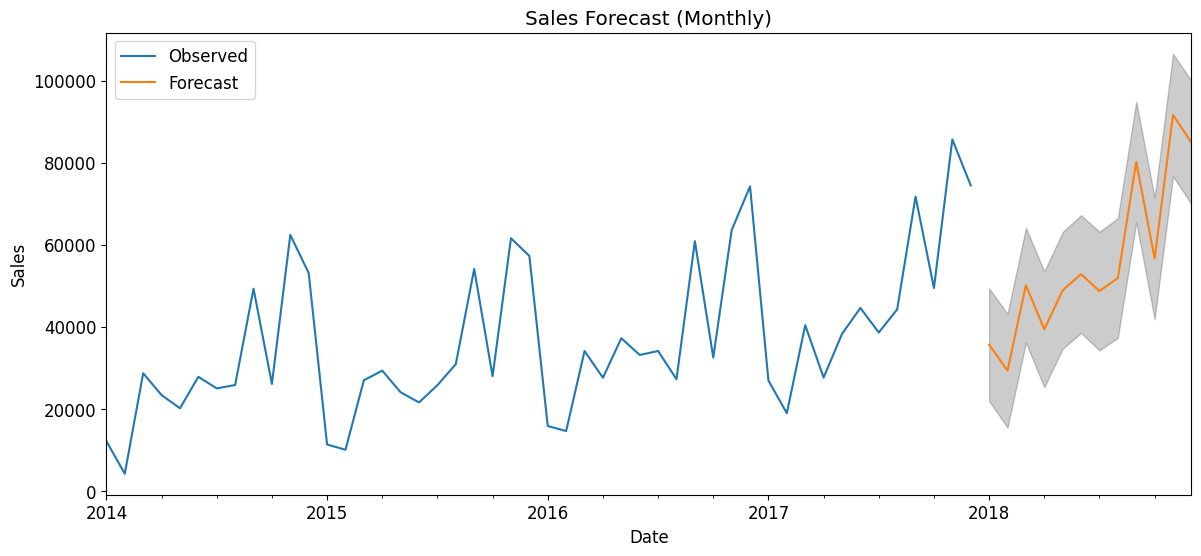

In [ ]:
# 6. Plot
ax = monthly_sales.plot(label='Observed', figsize=(14, 6))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.title('Sales Forecast (Monthly)')
plt.show()

#6.Product Analysis : Categories, Sub-category

**Question 2 : Which category made the most sales over years?**

In [ ]:
df_category = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Order ID': 'count'}).round().reset_index()
df_category = df_category.rename(columns={'Order ID': 'Item'})
df_category

,Category,Sales,Profit,Item
0,Furniture,616869.0,38656.0,2121
1,Office Supplies,584951.0,106766.0,6026
2,Technology,553587.0,84610.0,1847


In [ ]:
# percentage
df_category.set_index('Category')
df_category_pct = df_category.set_index('Category').apply(lambda x: x/x.sum() * 100).round(2)
df_category_pct

,Sales,Profit,Item
Category,,,
Furniture,35.14,16.80,21.22
Office Supplies,33.32,46.41,60.30
Technology,31.54,36.78,18.48


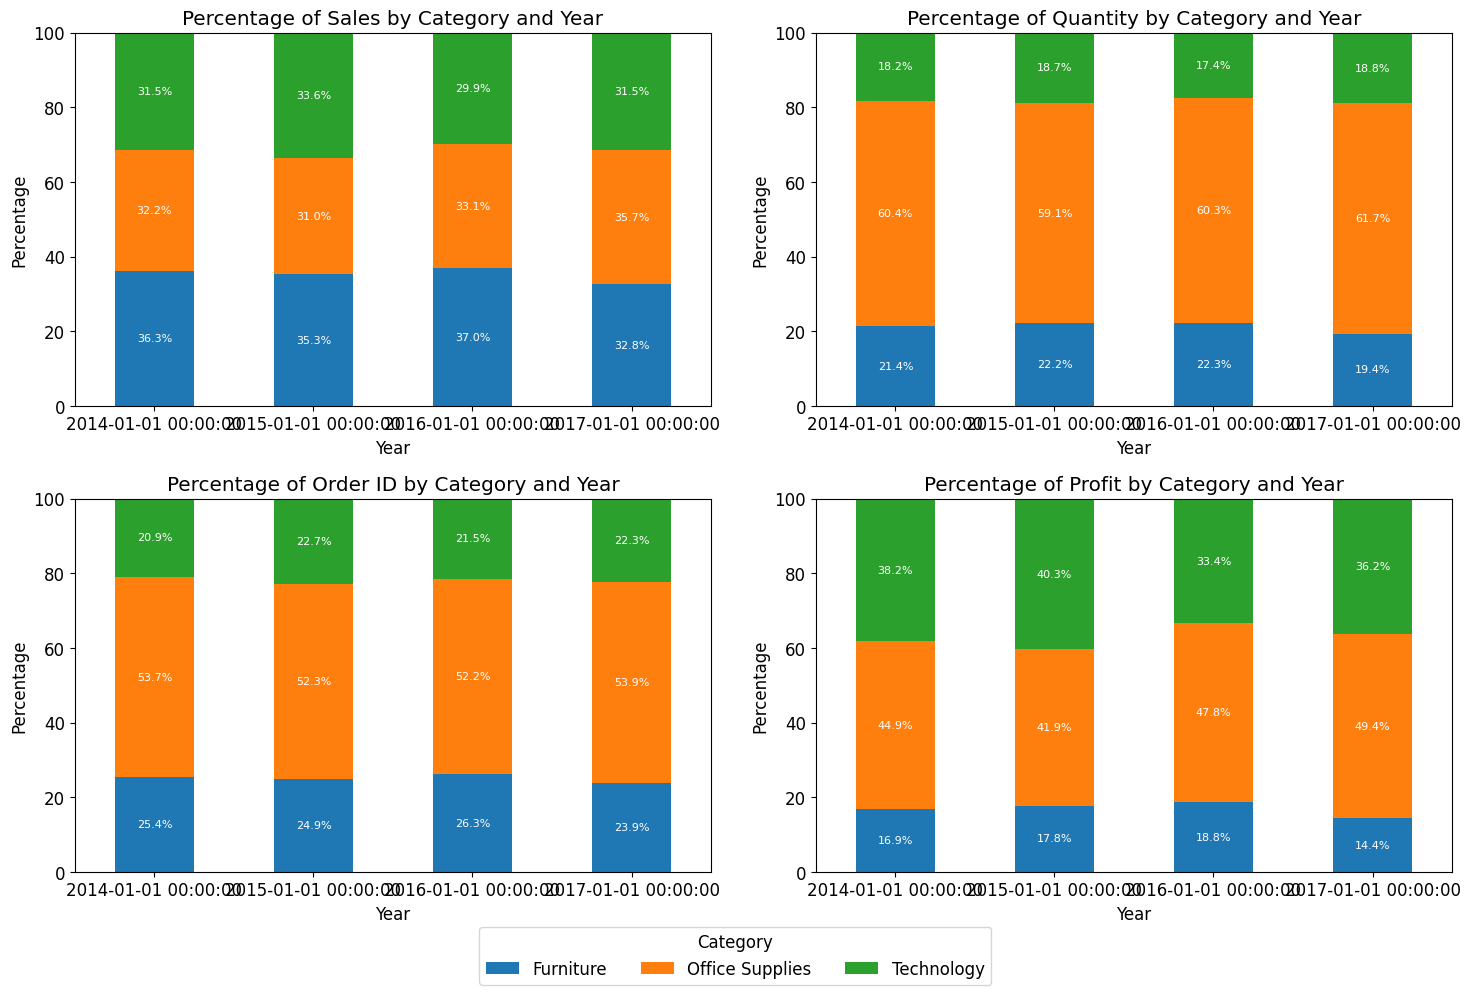

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame `df` với các cột: Year, Category, Sales, Quantity, Order ID, Profit

# Cấu hình chung
metrics = {
    'Sales': 'Percentage of Sales by Category and Year',
    'Quantity': 'Percentage of Quantity by Category and Year',
    'Order ID': 'Percentage of Order ID by Category and Year',
    'Profit': 'Percentage of Profit by Category and Year'
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (col, title) in enumerate(metrics.items()):
    if col == 'Order ID':
        grouped = df.groupby(['Year', 'Category'])[col].nunique().reset_index()
    else:
        grouped = df.groupby(['Year', 'Category'])[col].sum().reset_index()

    grouped['Percentage'] = grouped.groupby('Year')[col].transform(lambda x: x / x.sum() * 100)
    pivot_df = grouped.pivot(index='Year', columns='Category', values='Percentage')

    # Vẽ biểu đồ stacked bar
    ax = pivot_df.plot(kind='bar', stacked=True, ax=axs[i], legend=False)

    # Thêm nhãn phần trăm vào từng phần
    for j, (index, row) in enumerate(pivot_df.iterrows()):
        bottom = 0
        for category in pivot_df.columns:
            height = row[category]
            if height > 5:
                ax.text(j, bottom + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='white')
            bottom += height

    ax.set_title(title)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Year')
    ax.set_ylim(0, 100)
    ax.set_xticks(range(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.index, rotation=0)

# Thêm legend chỉ 1 lần (ở dưới cùng)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Category', loc='lower center', ncol=len(labels))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


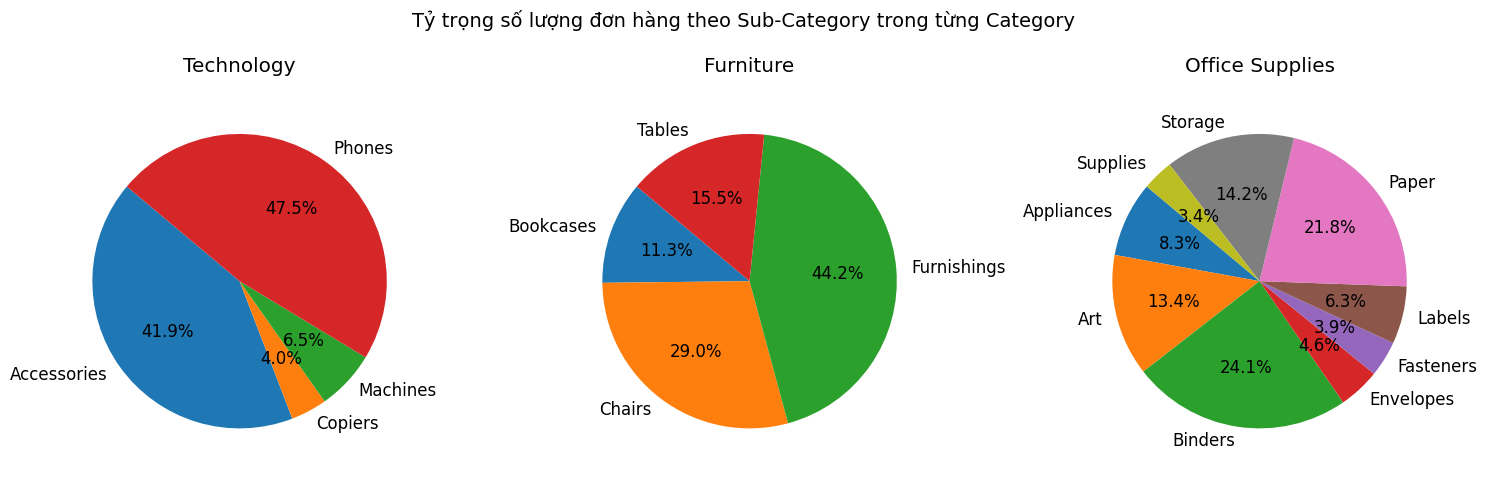

In [ ]:
import matplotlib.pyplot as plt

categories = ['Technology', 'Furniture', 'Office Supplies']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 3 biểu đồ trên cùng một hàng

for i, category in enumerate(categories):
    df_cat = df[df['Category'] == category]
    order_counts = df_cat.groupby('Sub-Category')['Order ID'].nunique()

    axes[i].pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{category}')
    axes[i].axis('equal')  # Đảm bảo hình tròn đều

plt.suptitle('Tỷ trọng số lượng đơn hàng theo Sub-Category trong từng Category', fontsize=14)
plt.tight_layout()
plt.show()


Furniture
  + Chiếm tỷ trọng cao trong doanh số (~32–37%), cho thấy giá trị đơn hàng trung bình cao. Tuy nhiên, lợi nhuận tạo ra lại thấp, đặc biệt là năm 2017 (chỉ 14.4%) -> giá trị đơn hàng trung bình cao, Chi phí cao hoặc biên lợi nhuận thấp

Office Supplies:
  + Chiếm tỷ trọng lớn nhất về số lượng và số đơn hàng (~60% số lượng, ~53% đơn hàng). Doanh số và lợi nhuận trung bình -> nhóm sản phẩm bán chạy, nhưng lợi nhuận không cao → phù hợp cho chiến lược volume

Technology
  + Mặc dù số lượng bán và đơn hàng không quá cao, nhưng lợi nhuận mang lại lớn nhất (36–40%).Doanh số khá ổn định (~30%). ->  biên lợi nhuận cao, là nhóm sản phẩm có tiềm năng lợi nhuận

KẾT LUẬN :
  + Tập trung đẩy mạnh sản phẩm công nghệ (Technology) để tối đa hoá lợi nhuận.

  + Tối ưu lại hoạt động kinh doanh Furniture nhằm cải thiện lợi nhuận (giảm chi phí hoặc tăng giá trị đơn hàng).

  + Kiểm soát chi phí và logistic cho Office Supplies – sản phẩm nhiều đơn hàng và số lượng nhưng ít lợi nhuận.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính tổng Sales, Profit và số Order duy nhất cho từng sản phẩm
product_summary = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).rename(columns={'Sales': 'Total Sales', 'Profit': 'Total Profit', 'Order ID': 'Order Count'})

# -----------------------
# 1. BẢNG: Top 10 sản phẩm theo tổng Sales
top_sales = product_summary.sort_values(by='Total Sales', ascending=False).head(10)
print("🔹 Top 10 sản phẩm theo Tổng Doanh thu (Sales):")
display(top_sales.reset_index())

# -----------------------
# 2. BẢNG: Top 10 sản phẩm theo tổng Profit
top_profit = product_summary.sort_values(by='Total Profit', ascending=False).head(10)
print("\n🔹 Top 10 sản phẩm theo Tổng Lợi nhuận (Profit):")
display(top_profit.reset_index())

# -----------------------
# 3. BẢNG: Top 10 sản phẩm theo số lượng đơn hàng (Distinct Order ID)
top_orders = product_summary.sort_values(by='Order Count', ascending=False).head(10)
print("\n🔹 Top 10 sản phẩm theo Số lượng đơn hàng:")
display(top_orders.reset_index())


🔹 Top 10 sản phẩm theo Tổng Doanh thu (Sales):


,Product Name,Total Sales,Total Profit,Order Count
0,GBC DocuBind TL300 Electric Binding System,9992.7940,967.0048,11
1,SAFCO Arco Folding Chair,9759.4875,1013.6308,13
2,Fellowes PB500 Electric Punch Plastic Comb Bin...,9380.7915,1241.6192,10
3,Bretford Rectangular Conference Table Tops,8906.5110,297.6726,12
4,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",8667.1695,1210.6376,12
5,Tennsco Double-Tier Lockers,8498.2325,447.7488,12
6,Tennsco 6- and 18-Compartment Lockers,8288.1315,1081.0050,11
7,GBC Ibimaster 500 Manual ProClick Binding System,7920.6105,186.9792,9
8,Global Troy Executive Leather Low-Back Tilter,7893.9635,744.5974,9
9,Hewlett Packard LaserJet 3310 Copier,7660.6200,1347.7632,8



🔹 Top 10 sản phẩm theo Tổng Lợi nhuận (Profit):


,Product Name,Total Sales,Total Profit,Order Count
0,"Hot File 7-Pocket, Floor Stand",7447.7250,1558.3842,13
1,Plantronics CS510 - Over-the-Head monaural Wir...,7393.7700,1436.6538,10
2,Adjustable Depth Letter/Legal Cart,6923.4510,1396.0924,11
3,Hewlett Packard LaserJet 3310 Copier,7660.6200,1347.7632,8
4,Honeywell Enviracaire Portable HEPA Air Cleane...,7193.0875,1335.6308,8
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,9380.7915,1241.6192,10
6,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",8667.1695,1210.6376,12
7,Plantronics Savi W720 Multi-Device Wireless He...,6475.6875,1179.2928,7
8,Ibico Ibimaster 300 Manual Binding System,6221.4415,1126.2208,8
9,Sharp 1540cs Digital Laser Copier,4399.9200,1113.8736,7



🔹 Top 10 sản phẩm theo Số lượng đơn hàng:


,Product Name,Total Sales,Total Profit,Order Count
0,Staple envelope,1687.328,751.6290,48
1,Staples,760.658,292.2046,46
2,Easy-staple paper,2504.192,1096.0292,46
3,Avery Non-Stick Binders,230.134,43.5530,20
4,Staples in misc. colors,484.512,124.0516,19
5,Staple remover,271.092,24.0678,18
6,KI Adjustable-Height Table,4552.641,68.0068,18
7,Storex Dura Pro Binders,289.914,50.5494,17
8,Staple-based wall hangings,422.288,121.9936,16
9,Logitech 910-002974 M325 Wireless Mouse for We...,1409.530,536.2212,15


#7.Location Analysis : Region, State, City

**Q3 : Which REGION/CITY made the most sales over years?**

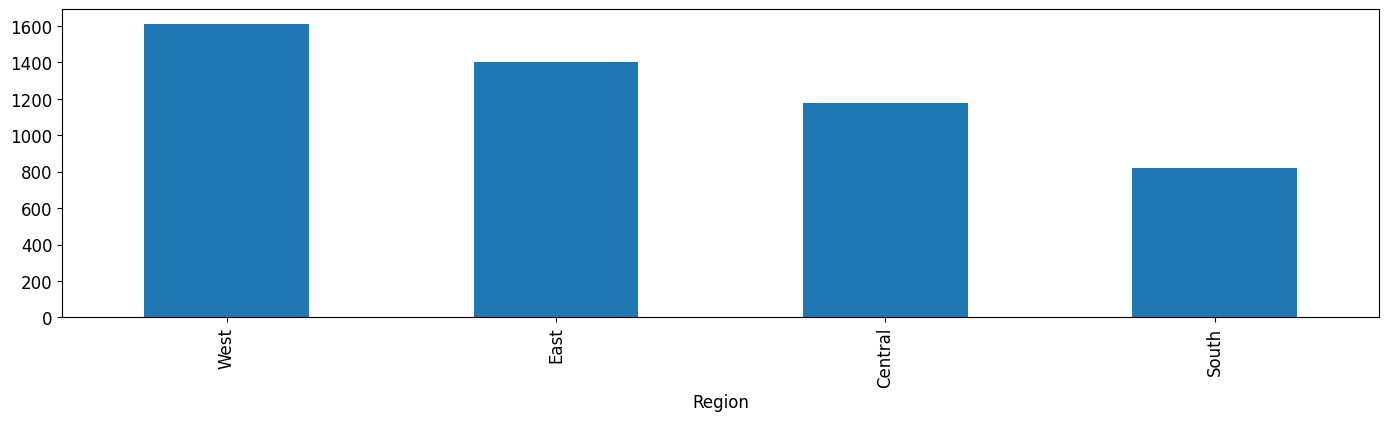

In [ ]:
plt.figure(figsize=(17, 4))
df.groupby('Region')['Order ID'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

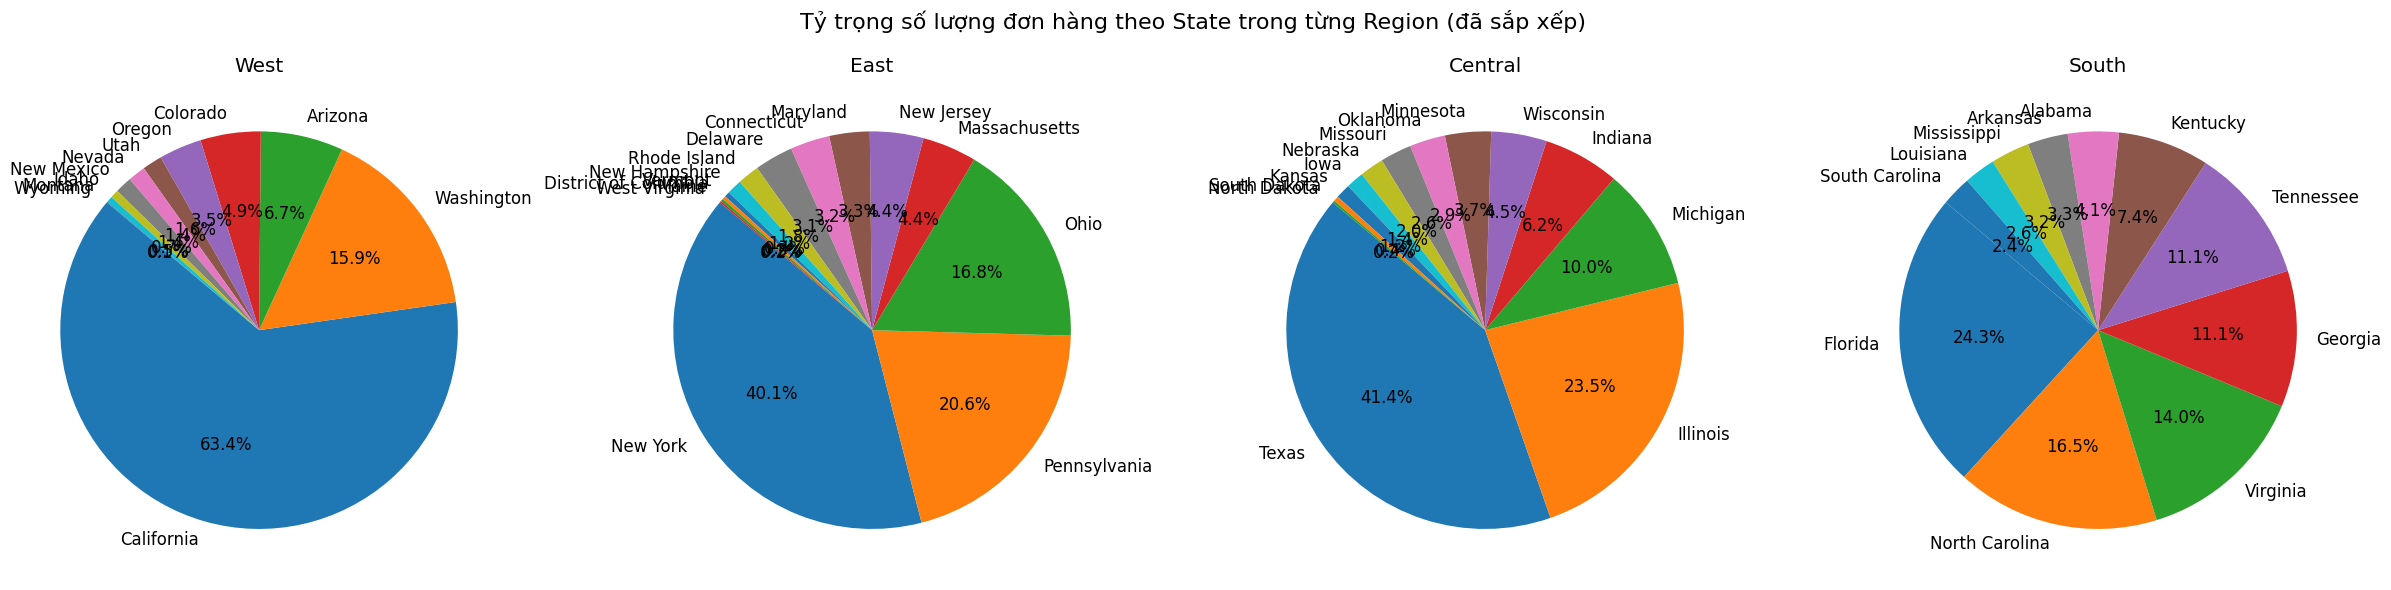

In [ ]:
import matplotlib.pyplot as plt

regions = ['West', 'East', 'Central', 'South']
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Tăng chút size cho dễ nhìn

for i, region in enumerate(regions):
    df_region = df[df['Region'] == region]
    order_counts = df_region.groupby('State')['Order ID'].nunique().sort_values(ascending=False)  # Sắp xếp giảm dần

    axes[i].pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{region}')
    axes[i].axis('equal')  # Đảm bảo hình tròn đều

plt.suptitle('Tỷ trọng số lượng đơn hàng theo State trong từng Region (đã sắp xếp)', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính tổng Sales, Profit và số Order duy nhất cho từng thành phố
city_summary = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).rename(columns={'Sales': 'Total Sales', 'Profit': 'Total Profit', 'Order ID': 'Order Count'})

# -----------------------
# 1. BẢNG: Top 10 thành phố theo tổng Sales
top_sales = city_summary.sort_values(by='Total Sales', ascending=False).head(10)
print("🔹 Top 10 thành phố theo Tổng Doanh thu (Sales):")
display(top_sales.reset_index())

# -----------------------
# 2. BẢNG: Top 10 thành phố theo tổng Profit
top_profit = city_summary.sort_values(by='Total Profit', ascending=False).head(10)
print("\n🔹 Top 10 thành phố theo Tổng Lợi nhuận (Profit):")
display(top_profit.reset_index())

# -----------------------
# 3. BẢNG: Top 10 thành phố theo số lượng đơn hàng
top_orders = city_summary.sort_values(by='Order Count', ascending=False).head(10)
print("\n🔹 Top 10 thành phố theo Số lượng đơn hàng:")
display(top_orders.reset_index())


🔹 Top 10 thành phố theo Tổng Doanh thu (Sales):


,City,Total Sales,Total Profit,Order Count
0,New York City,178695.5415,33653.7487,450
1,Los Angeles,142399.5320,22646.3748,384
2,San Francisco,85208.8430,14523.1395,265
3,Philadelphia,84368.0995,-2079.5334,265
4,Seattle,82859.1845,14154.2994,212
5,Houston,55745.8914,-559.5960,188
6,Chicago,42112.5070,-251.9211,171
7,San Diego,37096.7820,5160.6685,88
8,Columbus,33872.2575,5169.1455,111
9,Springfield,30516.7985,4189.1697,73



🔹 Top 10 thành phố theo Tổng Lợi nhuận (Profit):


,City,Total Sales,Total Profit,Order Count
0,New York City,178695.5415,33653.7487,450
1,Los Angeles,142399.5320,22646.3748,384
2,San Francisco,85208.8430,14523.1395,265
3,Seattle,82859.1845,14154.2994,212
4,Detroit,26892.0945,6272.8774,53
5,Columbus,33872.2575,5169.1455,111
6,San Diego,37096.7820,5160.6685,88
7,Springfield,30516.7985,4189.1697,73
8,Jackson,17186.8615,3926.8662,37
9,Richmond,15144.3500,3695.2283,41



🔹 Top 10 thành phố theo Số lượng đơn hàng:


,City,Total Sales,Total Profit,Order Count
0,New York City,178695.5415,33653.7487,450
1,Los Angeles,142399.5320,22646.3748,384
2,San Francisco,85208.8430,14523.1395,265
3,Philadelphia,84368.0995,-2079.5334,265
4,Seattle,82859.1845,14154.2994,212
5,Houston,55745.8914,-559.5960,188
6,Chicago,42112.5070,-251.9211,171
7,Columbus,33872.2575,5169.1455,111
8,San Diego,37096.7820,5160.6685,88
9,Dallas,19603.2651,-384.6711,80
